# 1. Install Dependencies and Setup

In [103]:
import tensorflow as tf
import os
from sklearn import metrics
import random as python_random
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow import keras

In [104]:
# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(123)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(123)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)

# 2. Remove dodgy images

In [105]:
import cv2
import imghdr

In [106]:
# data_dir = 'data' 

train_dir = 'data/Train/'
test_dir = 'data/Test/'

In [107]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [108]:
for image_class in os.listdir(train_dir): 
    for image in os.listdir(os.path.join(train_dir, image_class)):
        image_path = os.path.join(train_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/Train/Scab_Apple/output
Issue with image data/Train/Normal_Apple/output
Issue with image data/Train/Blotch_Apple/output
Issue with image data/Train/Rot_Apple/output


In [109]:
for image_class in os.listdir(test_dir): 
    for image in os.listdir(os.path.join(test_dir, image_class)):
        image_path = os.path.join(test_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

Total_train_data aangemaakt om balans tussen klassen in de set weer te geven

In [110]:
# data = tf.keras.utils.image_dataset_from_directory('data') changed from relative path to variable
total_train_data = tf.keras.utils.image_dataset_from_directory(train_dir, batch_size=366)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 366 files belonging to 4 classes.
Found 366 files belonging to 4 classes.


testData = tf.keras.preprocessing.image_dataset_from_directory(
    dataDirectory,
    labels='inferred',
    label_mode='categorical',
    seed=324893,
    image_size=(height,width),
    batch_size=32)


predictions = np.array([])
labels =  np.array([])
for x, y in testData:
  predictions = np.concatenate([predictions, model.predict_classes(x)])
  labels = np.concatenate([labels, np.argmax(y.numpy())])

In [111]:
print (image_path)

data/Test/Rot_Apple/aybx08.jpg


In [112]:
    for element in total_train_data.as_numpy_iterator(): 
        X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

{0: 116, 1: 67, 2: 98, 3: 85}

blotch 32%, normal 18%, rot 27%, scab 23% 

In [113]:
print (train_data.class_names)

['Blotch_Apple', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']


In [114]:
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=115)

Found 115 files belonging to 4 classes.


In [115]:
    for element in test_data.as_numpy_iterator(): 
        X, y = element
    # print (y)  

unique2, counts2 = np.unique(y, return_counts=True)
dict(zip(unique2, counts2))

{0: 30, 1: 24, 2: 33, 3: 28}

In [116]:
# data_iterator = data.as_numpy_iterator()
train_iterator = train_data.as_numpy_iterator()

In [117]:
test_iterator = test_data.as_numpy_iterator()

In [118]:
# batch = data_iterator.next()
train_batch = train_iterator.next()

In [119]:
test_batch = test_iterator.next()

VISUALISE TRAIN AND TEST DATA

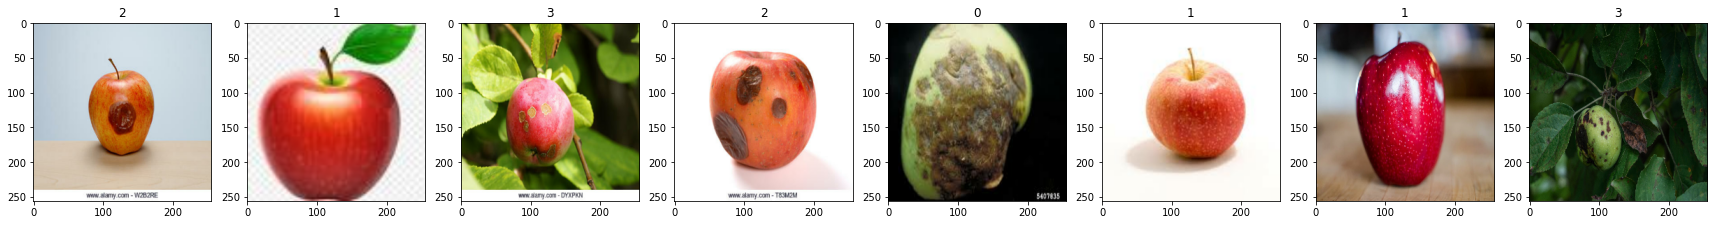

In [120]:
fig, ax = plt.subplots(ncols=8, figsize=(30,30))
for idx, img in enumerate(train_batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

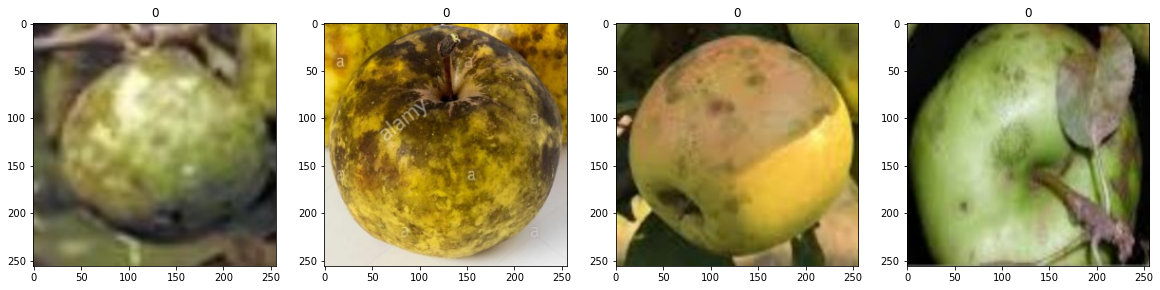

In [121]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

# 4. Scale Data

In [122]:
train_data = train_data.map(lambda x,y: (x/255, y))

In [123]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [124]:
train_data.as_numpy_iterator().next()

(array([[[[2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          [2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          [2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          ...,
          [2.9019609e-01, 2.7450982e-01, 2.6274511e-01],
          [2.9378062e-01, 2.7809435e-01, 2.6632965e-01],
          [2.8507966e-01, 2.6939338e-01, 2.5762868e-01]],
 
         [[2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          [2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          [2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          ...,
          [2.9300800e-01, 2.7732173e-01, 2.6555702e-01],
          [2.9411766e-01, 2.7843139e-01, 2.6666668e-01],
          [2.8507966e-01, 2.6939338e-01, 2.5762868e-01]],
 
         [[2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          [2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          [2.0392157e-01, 1.9215687e-01, 1.7254902e-01],
          ...,
          [2.9681277e-01, 2.8112650e-01, 2.6936179e-01],
          [2.9445466e-01, 2.7876839e-

In [125]:
test_data.as_numpy_iterator().next()

(array([[[[9.80392173e-02, 7.84313753e-02, 9.41176489e-02],
          [1.00635722e-01, 8.10278803e-02, 9.67141539e-02],
          [1.06288299e-01, 8.66804570e-02, 1.02366731e-01],
          ...,
          [7.16835201e-01, 6.92133904e-01, 3.28193933e-01],
          [7.28140295e-01, 7.01554835e-01, 3.45151663e-01],
          [7.33333349e-01, 7.05882370e-01, 3.52941185e-01]],
 
         [[1.04090072e-01, 8.44822302e-02, 1.00168504e-01],
          [1.06953673e-01, 8.73458236e-02, 1.03032097e-01],
          [1.13187693e-01, 9.35798511e-02, 1.09266125e-01],
          ...,
          [7.36559570e-01, 7.11858273e-01, 3.47918302e-01],
          [7.48446107e-01, 7.21860647e-01, 3.65457475e-01],
          [7.53906250e-01, 7.26455271e-01, 3.73514086e-01]],
 
         [[1.14659928e-01, 9.50520858e-02, 1.10738359e-01],
          [1.17990084e-01, 9.83822420e-02, 1.14068516e-01],
          [1.25239804e-01, 1.05631962e-01, 1.21318236e-01],
          ...,
          [7.71014750e-01, 7.46313453e-01, 3.8237

# 5. Split Data

In [126]:
imageCountTrain = len(train_data)
print (imageCountTrain)
imageCountTest = len(test_data)
print (imageCountTest)

12
1


In [127]:
train_size = int(len(train_data)*.8)
val_size = int(len(train_data)*.2)
test_size = int(len(test_data))

In [128]:
print (train_size)

9


train_size

In [129]:
val_size

2

In [130]:
test_size

1

In [131]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
test = test_data.take(test_size)

# 6. Build Deep Learning Model

In [132]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [133]:
# Define a simple sequential model
num_classes = 4
# lossFunction = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# gdAlgorithm = keras.optimizers.Adam(learning_rate=0.001)
# nrOfEpochs = 5
img_height = 256
img_width = 256
image_size=(img_height, img_width)
batch_size = 32


def create_model():
  model = tf.keras.Sequential([
    keras.layers.Conv2D(32, 3,input_shape=(img_height, img_width, 3), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 32)      

# 7. Train

In [134]:
logdir='logs'

In [135]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [136]:
# tf.random.set_seed(221)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
9/9 [==============================] - 7s 736ms/step - loss: 1.3847 - sparse_categorical_accuracy: 0.4167 - val_loss: 1.2239 - val_sparse_categorical_accuracy: 0.4219
Epoch 2/10
9/9 [==============================] - 7s 768ms/step - loss: 0.9840 - sparse_categorical_accuracy: 0.5694 - val_loss: 0.6402 - val_sparse_categorical_accuracy: 0.7656
Epoch 3/10
9/9 [==============================] - 7s 706ms/step - loss: 0.6907 - sparse_categorical_accuracy: 0.7326 - val_loss: 0.6596 - val_sparse_categorical_accuracy: 0.7344
Epoch 4/10
9/9 [==============================] - 7s 702ms/step - loss: 0.6112 - sparse_categorical_accuracy: 0.7604 - val_loss: 0.6507 - val_sparse_categorical_accuracy: 0.7656
Epoch 5/10
9/9 [==============================] - 7s 707ms/step - loss: 0.5360 - sparse_categorical_accuracy: 0.7812 - val_loss: 0.4552 - val_sparse_categorical_accuracy: 0.8438
Epoch 6/10
9/9 [==============================] - 7s 710ms/step - loss: 0.5073 - sparse_categorical_accuracy: 

# 8. Plot Performance

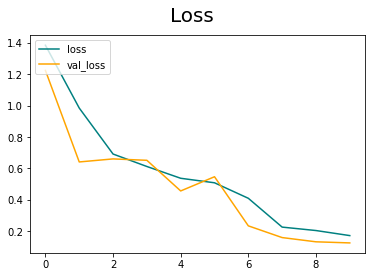

In [137]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [138]:
print(hist.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


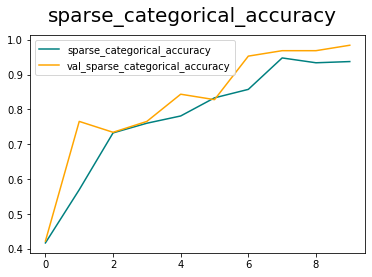

In [139]:
fig = plt.figure()
plt.plot(hist.history['sparse_categorical_accuracy'], color='teal', label='sparse_categorical_accuracy')
plt.plot(hist.history['val_sparse_categorical_accuracy'], color='orange', label='val_sparse_categorical_accuracy')
fig.suptitle('sparse_categorical_accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [140]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [141]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [142]:
len(test)

1

In [143]:
for element in test_data.as_numpy_iterator(): 
    X, y = element
    yhat = model.predict(X)
    pred = (np.argmax(yhat, axis=-1))
    # pre.update_state(y, yhat)
    # re.update_state(y, yhat)
    # acc.update_state(y, yhat)

    # print (yhat)
    # print (y)

print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


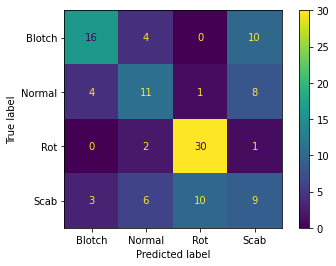

In [144]:

# plt.plot(history.history['accuracy'], label='Train accuracy')
# plt.plot(history_test.history['accuracy'], label = 'Test accuracy')

actual = y
predicted = pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Blotch', 'Normal', 'Rot', 'Scab'])

cm_display.plot()
plt.show()

In [145]:
testscore = model.evaluate(test_data)

1/1 [==============================] - 1s 1s/step - loss: 1.4701 - sparse_categorical_accuracy: 0.5739


In [146]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [147]:
import cv2

In [148]:
img = cv2.imread('data/Test/Normal_Apple/normal_2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

[ WARN:0@158017.773] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data/Test/Normal_Apple/normal_2.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


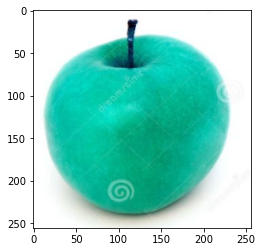

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
pred = np.argmax(yhat, axis=-1)

In [ ]:
if pred == [3]: print ('the model predicts an apple with scab')
elif pred == [2]: print ('the model predicts an apple with rot')
elif pred == [1]: print ('the model predicts this is a normal healthy apple')
elif pred == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts this is a normal healthy apple


if num > 0:
    print("Positive number")
elif num == 0:
    print("Zero")
else:
    print("Negative number")

# 11. Save the Model and test loading the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','appleclassifier422.h5'))

In [ ]:
new_model = load_model('models/appleclassifier422.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [ ]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
pred_new = np.argmax(yhat_new, axis=-1)

In [ ]:
if pred_new == [3]: print ('the model predicts an apple with scab')
elif pred_new == [2]: print ('the model predicts an apple with rot')
elif pred_new == [1]: print ('the model predicts this is a normal healthy apple')
elif pred_new == [0]: print ('the model predicts this is a blotched apple')
else: print ('the model also has no idea what you put in')

the model predicts this is a normal healthy apple


De vragen die ik bij 2_1 nog had zijn beantwoord door uitwerking 

Nieuwe vraag:

voor het aanmaken van de data moet ik soms onderstaand commando runnen bij foutmelding:

find . -name "*.DS_Store" -type f -delete

wat is dit?


Van to do 1_2 zijn confusion matrix en plots afgehandeld

new to do - 
To do - image rescalen naar 100x100
expirimenteren met model / dataset en augmentation
transfer learning